In [ ]:
%pylab inline
%load_ext autoreload
%autoreload 2

from utilities import *
from interfaces import *
import numpy as np

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Linfty error:  

1.73333694995e-33


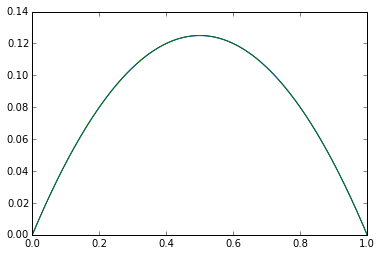

In [28]:
p = 2 # Degree
n = 5 # Knots Boundaries
# knots = np.r_[p*[0], linspace(0,1,n), p*[1]]  # Make an open knot vector
knots = np.r_[(p-1)*[0], linspace(0,1,n), (p-1)*[1]] # Make an uniform vector, such that end points are zero
vs = BsplineVectorSpace(p, knots)

# Collocation points
x = linspace(0,1,vs.n_dofs+2)[1:-1]

A = -interpolation_matrix(vs, x, 2)  # Second derivatives

# Laplace equation using Collocation approach...

# A*u = -u''(x) = f(x) 
f = lambda x: 1
exact = lambda x: x*(1-x)/2

cu = squeeze(np.linalg.solve(A, f(x)))

s = linspace(0,1,1000)
u = vs.element(cu)

plot(s, u(s))
plot(s, exact(s))

print ('L^infty error: ', max(abs(u(s)-exact(s))))